<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [2]:
%pwd

'C:\\Users\\John\\Coding\\Lambda\\DS-Unit-4-Sprint-1-NLP-master\\module1-text-data'

In [3]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
def simplestar(rating):
    return int(rating[1])

shops['star_rating'] = shops['star_rating'].apply(simplestar)

In [5]:
# def tokenize(text):
#     """Parses a string into a list of semantic units (words)

#     Args:
#         text (str): The string that the function will tokenize.

#     Returns:
#         list: tokens parsed out by the mechanics of your choice
#     """
    
#     tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
#     tokens = tokens.lower().split()
    
#     return tokens

# shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [ ]:
# shops['tokens'].value_counts()

In [7]:
# # Object from Base Python
# from collections import Counter

# # The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
# word_counts = Counter()

# # Update it based on a split of each of our documents
# shops['tokens'].apply(lambda x: word_counts.update(x))

# # Print out the 10 most common words
# word_counts.most_common(10)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [8]:
bad = shops[shops['star_rating'] < 4].copy()
lessbad = shops[shops['star_rating'] > 3].copy()
bad.shape, lessbad.shape

((1476, 4), (6140, 4))

In [9]:
# def count(docs):

#         word_counts = Counter()
#         appears_in = Counter()
        
#         total_docs = len(docs)

#         for doc in docs:
#             word_counts.update(doc)
#             appears_in.update(set(doc))

#         temp = zip(word_counts.keys(), word_counts.values())
        
#         wc = pd.DataFrame(temp, columns = ['word', 'count'])

#         wc['rank'] = wc['count'].rank(method='first', ascending=False)
#         total = wc['count'].sum()

#         wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
#         wc = wc.sort_values(by='rank')
#         wc['cul_pct_total'] = wc['pct_total'].cumsum()

#         t2 = zip(appears_in.keys(), appears_in.values())
#         ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
#         wc = ac.merge(wc, on='word')

#         wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
#         return wc.sort_values(by='rank')

# wc = count(bad['tokens'])
# wc.head(30)

In [10]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [11]:
# badtokens = []

# """ Make them tokens """
# for doc in tokenizer.pipe(bad['full_review_text'], batch_size=500):
#     doc_tokens = [token.text for token in doc]
#     badtokens.append(doc_tokens)

# bad['tokens'] = badtokens
# bad['tokens'].head()

In [12]:
# lessbadtokens = []

# """ Make them tokens """
# for doc in tokenizer.pipe(lessbad['full_review_text'], batch_size=500):
#     doc_tokens = [token.text for token in doc]
#     lessbadtokens.append(doc_tokens)

# lessbad['tokens'] = lessbadtokens
# lessbad['tokens'].head()

In [13]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'coffee.', 'coffee,', 'food', 'place', 'work', 'check-in', 'check-ins', 'pretty', 'nice', 'people', 'shop', 'I', 'i', 'great', 'good', 'like', 'got', 'it', "it's", 'it.', "i'm", "i've", '-', '1', ' ', ''])

In [14]:
def stopgap(df, textfield):
    
    tokens = []

    for doc in tokenizer.pipe(df[textfield], batch_size=500):

        doc_tokens = []

        for token in doc: 
            if token.text.lower() not in STOP_WORDS:
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    df['tokens'] = tokens
    
    return df

bad = stopgap(bad, 'full_review_text')
lessbad = stopgap(lessbad, 'full_review_text')

In [15]:
wcb = count(bad['tokens'])
wcb.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
192,don't,340,430,1.0,0.005413,0.005413,0.230352
229,time,264,351,2.0,0.004419,0.009832,0.178862
33,service,261,314,3.0,0.003953,0.013785,0.176829
346,ordered,240,296,4.0,0.003726,0.017511,0.162602
467,didn't,222,292,5.0,0.003676,0.021187,0.150407
103,come,234,285,6.0,0.003588,0.024775,0.158537
381,order,174,253,7.0,0.003185,0.027960,0.117886
353,little,203,249,8.0,0.003135,0.031094,0.137534
312,drink,166,222,9.0,0.002795,0.033889,0.112466
339,came,181,214,10.0,0.002694,0.036583,0.122629


In [16]:
wclb = count(lessbad['tokens'])
wclb.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,love,1263,1604,1.0,0.005778,0.005778,0.205700
597,little,1027,1230,2.0,0.004431,0.010209,0.167264
375,best,951,1093,3.0,0.003937,0.014146,0.154886
166,friendly,986,1014,4.0,0.003653,0.017799,0.160586
57,austin,875,1013,5.0,0.003649,0.021448,0.142508
46,definitely,889,1002,6.0,0.003609,0.025057,0.144788
468,time,835,994,7.0,0.003581,0.028638,0.135993
344,don't,793,965,8.0,0.003476,0.032114,0.129153
32,latte,713,949,9.0,0.003419,0.035532,0.116124
542,come,797,908,10.0,0.003271,0.038803,0.129805


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


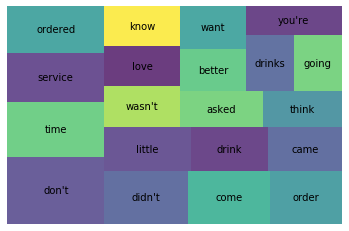

In [17]:
wcb_top20 = wcb[wcb['rank'] <= 20]

squarify.plot(sizes=wcb_top20['pct_total'], label=wcb_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

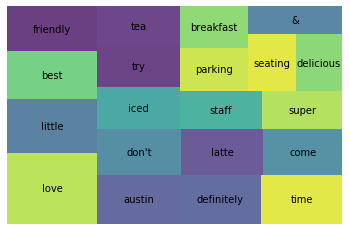

In [18]:
wclb_top20 = wclb[wclb['rank'] <= 20]

squarify.plot(sizes=wclb_top20['pct_total'], label=wclb_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

